In [ ]:
#Assignment 3
#Assignment based on Logistic regression using python.
#Snehal Hon(145) ,Batch-T3

In [5]:
#import pandas
import pandas as pd
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']
# load dataset
pima = pd.read_csv(r"d:\Downloads\diabetes (2).csv", header=None, names=col_names)

In [6]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [8]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure',  'Insulin', 'BMI', 'DiabetesPedigree', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [13]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [18]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# Ensure corresponding labels (y_train) are also aligned
y_train = y_train.loc[X_train.index]


In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [21]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[111,  20],
       [ 18,  44]])

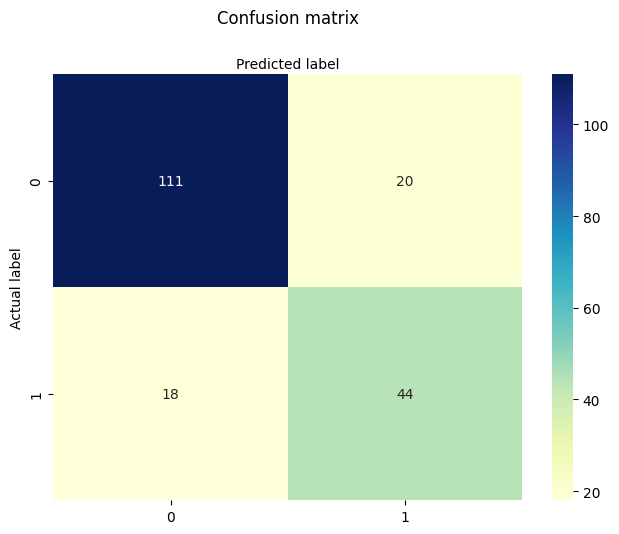

In [31]:
# import required modules
from matplotlib.text import Text
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [23]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.86      0.85      0.85       131
   with diabetes       0.69      0.71      0.70        62

        accuracy                           0.80       193
       macro avg       0.77      0.78      0.78       193
    weighted avg       0.80      0.80      0.80       193



In [27]:
y_test = pd.to_numeric(y_test)

In [28]:
y_train = pd.to_numeric(y_train)


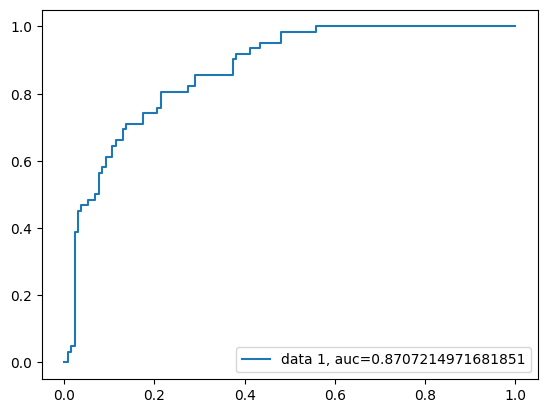

In [29]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()